## Mon premier histogrammme

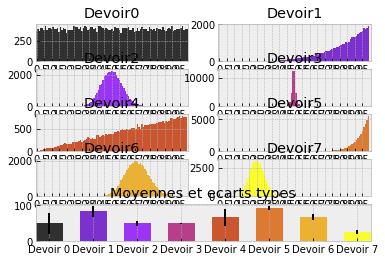

In [18]:
"""
"""
from numpy.random import uniform, power, poisson, laplace
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('bmh')

nb_etu = 40000
n_max = 100

devoir = [[np.floor(i) for i in uniform(0, n_max+1, nb_etu)],
          [np.floor(j) for j in n_max*power(5, nb_etu)],
          [np.floor(k) for k in poisson(n_max/2, nb_etu)],
          [np.floor(l) for l in laplace(n_max/2, 1, nb_etu)],
          [np.floor(j) for j in n_max*power(2, nb_etu)],
          [np.floor(j) for j in n_max*power(15, nb_etu)],
          [np.floor(k) for k in poisson(2*n_max/3, nb_etu)],
          [np.floor(k) for k in poisson(n_max/4, nb_etu)]
         ]

n_dev = len(devoir)
n_row = int(np.ceil(n_dev/2))

ax = [plt.subplot2grid((n_row + 1, 2), (i, j)) for i in range(n_row) for j in range(2)]
ax.append(plt.subplot2grid((n_row + 1, 2), (n_row, 0), colspan=2))

for k in range(n_dev):
    ax[k].set_xlim(0, n_max)    
    
for k in range(n_dev):
    ax[k].set_title('Devoir' + str(k))

ax[-1].set_title('Moyennes et ecarts types')

cmap = plt.get_cmap('gnuplot')
couleur = [cmap(i) for i in np.linspace(0, 1, n_dev)]

for k in range(n_dev):
    ax[k].hist(devoir[k], histtype="bar",
             bins=n_max + 1, range=(0, n_max), alpha=0.8, color = couleur[k])

ind = [k for k in range(0, n_max, 5)]
indx = [round(float(u)*n_max/(n_max+1) + n_max/(2*(n_max+1)), 2) for u in ind]
for k in range(n_dev):
    ax[k].set_xticks(indx)
    ax[k].set_xticklabels(ind)

ax[-1].set_xlim(0, 3*n_dev + 1)
means = [np.mean(d) for d in devoir]
stds = [np.std(d) for d in devoir]
ind = np.linspace(1, 3*n_dev, n_dev)
ax[-1].bar(ind, means, 2, alpha=0.8, yerr=stds, label='Moyennes', color=couleur)
ax[-1].set_xticks(ind)
ax[-1].set_xticklabels(['Devoir ' + str(k) for k in range(n_dev)])

plt.show()


## Ma première image

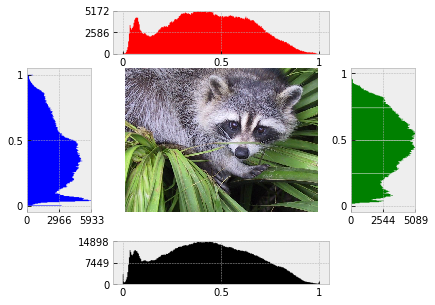

In [19]:
"""
"""
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from collections import Counter
from scipy import misc

urlretrieve('https://download.tuxfamily.org/tehessinmath/les_images/lenaFace.jpeg','lenaFace.jpeg')
urlretrieve('https://people.irisa.fr/Anne-Cecile.Orgerie/images/Grace_Hopper.png','Grace_Hopper.png')

matg = plt.imread('Grace_Hopper.png')
matl = plt.imread('lenaFace.jpeg')
mat = misc.face()/255
nx,ny,_ = np.shape(mat)

couls = ['r', 'g', 'b', 'k']
listes = [mat[:,:,k].reshape(nx*ny) for k in range(3)] + [mat.flatten()]
maxs = [max(Counter(ls).values()) for ls in listes]

#x rouge, x2 lumi, y vert, y2 bleu

#[left, bottom, width, height]
rect_main = [0.25, 0.25, 0.5, 0.5]
rect = [[0.25, 0.8, 0.5, 0.15],
        [0.8, 0.25, 0.15, 0.5],
        [0.05, 0.25, 0.15, 0.5],
        [0.25, 0.0, 0.5, 0.15]]

ax = [plt.axes(rect[k]) for k in range(4)]

for k in {1,2}:
    valtic = [0, maxs[k]//2, maxs[k]]
    abstic = [0,0.5, 1]
    ax[k].set_xlim((0,maxs[k]))
    ax[k].set_xticks(valtic)
    ax[k].set_xticklabels(valtic)
    ax[k].set_yticks(abstic)
    ax[k].set_yticklabels(abstic)
    ax[k].hist(listes[k], 256, color = couls[k], histtype='stepfilled', orientation='horizontal')
for k in {0,3}:
    valtic = [0, maxs[k]//2, maxs[k]]
    abstic = [0,0.5, 1]
    ax[k].set_ylim((0,maxs[k]))
    ax[k].set_yticks(valtic)
    ax[k].set_yticklabels(valtic)
    ax[k].set_xticks(abstic)
    ax[k].set_xticklabels(abstic)
    ax[k].hist(listes[k], 256, color = couls[k], histtype='stepfilled')



plt.figure(1, figsize=(10,10))
plt.axes(rect_main)
plt.imshow(mat)
plt.axis('off') # clear x- and y-axes

plt.show()


In [28]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

urlretrieve('https://download.tuxfamily.org/tehessinmath/les_images/lenaFace.jpeg','lenaFace.jpeg')
urlretrieve('https://people.irisa.fr/Anne-Cecile.Orgerie/images/Grace_Hopper.png','Grace_Hopper.png')
urlretrieve('https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fcdn.verboselogging.com%2Ftransloadit%2Flarge%2F82%2F8525fa07baffbfb4a4019ef85886fa%2Frecursive-hasselhoff.gif&f=1','k2000.gif')
mat=plt.imread('Grace_Hopper.png')
matl = plt.imread('lenaFace.jpeg')
matk = plt.imread('k2000.gif')
matr = misc.face()

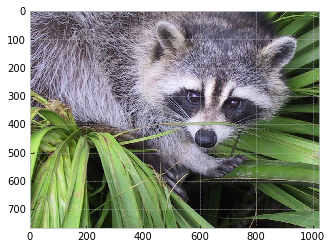

In [29]:
plt.imshow(matr)

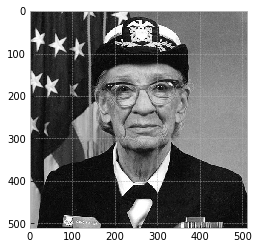

In [30]:
def mono(m):
    r, c, _ = np.shape(m)
    return(np.array([[np.mean(m[i,j]) for j in range(c)] for i in range(r)]))

plt.imshow(mono(mat), cmap=cm.gray)

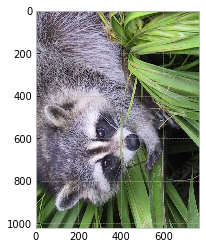

In [36]:
def tourne(m):
    r, c, _ = np.shape(m)
    return(np.array([[m[j,i] for j in range(r)] for i in range(c)]))

plt.imshow(tourne(matr), cmap=cm.gray)

In [32]:
def resolution(mat,k):
    r, c, _ = np.shape(mat)
    return np.array([[mat[k*i,k*j] for j in range(c//k)] for i in range(r//k)])

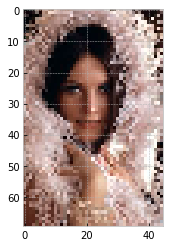

In [33]:
plt.imshow(resolution(matl,4), cmap=cm.gray)

In [34]:
def pauvre(m,k):
    return np.array([np.array([int(np.mean(x)/k) for x in ligne]) for ligne in m])


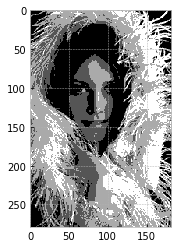

In [37]:
plt.imshow(pauvre(matl,64), cmap=cm.gray)

## Mon premier 3D

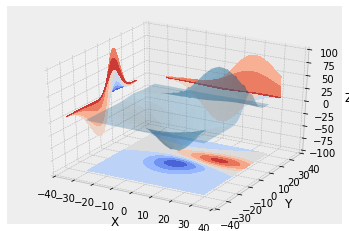

In [62]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()
